multiple linear regresion 
there are multiple dependent varibles \\n
y =  a x1 + b x2 +  c

In [3]:
import pandas as pd

df =  pd.read_csv('02Students.csv')

X = df.iloc[:, :-1]  # hours column 
Y = df.iloc[:,-1]  # marks 
df

,Hours,sHours,Marks
0,0,6,34
1,1,7,36
2,1,6,33
3,1,8,39
4,1,8,42
5,2,8,45
6,2,6,38
7,3,6,45
8,3,7,53
9,3,7,46


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1232)

regressor =  LinearRegression()

regressor.fit(x_train, y_train)

y_predict =  regressor.predict(x_test)


# R squared --> coefficient of determination 
# how much is variation in Y is described by varation in X
slr_score=  regressor.score(x_test, y_test)

# coefficient of line
slr_coefficient = regressor.coef_
slr_intercept = regressor.intercept_

# Y = slr_intercept +  slr_coefficient * x
from sklearn.metrics import mean_squared_error
import math


rmse =  math.sqrt(mean_squared_error(y_test,y_predict))
rmse


8.479105430005918

It is necessary to consider following thing when you add more and more dependent varibles.

R2 values higher means - varition in Y is explained by varition in X


Degress of Freedom 
# Degrees of Freedom (DoF) & R² Relation

Let:
- n = number of observations (rows)
- p = number of predictors (independent variables) (excluding intercept)
- yᵢ actual, ŷᵢ predicted, ȳ mean of y

Sums of Squares:
- SST (Total) = Σ (yᵢ − ȳ)²        DoF: n − 1
- SSE (Residual / Error) = Σ (yᵢ − ŷᵢ)²   DoF: n − p − 1
- SSR (Regression) = Σ (ŷᵢ − ȳ)²    DoF: p
Relation: SST = SSR + SSE and (n − 1) = p + (n − p − 1)

R² (Coefficient of Determination):
R² = 1 − (SSE / SST) = SSR / SST
##### Meaning: fraction of variance in y explained by the predictors.
##### Issue: R² never decreases when adding predictors (even useless ones).

Adjusted R² (penalizes extra predictors):
Adj R² = 1 − ( (SSE / (n − p − 1)) / (SST / (n − 1)) )
= 1 − (1 − R²) * (n − 1) / (n − p − 1)
Will increase only if new variable improves model more than expected by chance.

Mean Squares & F-test:
- MSR = SSR / p
- MSE = SSE / (n − p − 1)
- F = MSR / MSE  (tests if at least one β ≠ 0)

Real-Life Example:
Predict Exam Score using:
- x1: Study Hours
- x2: Attendance %
- x3: Past Semester GPA

eg. you have five shirts for 5 days. 
1 day you have 5 option 
2nd day you have 4 option 
...
5th day you have no option 
This is degrees of freedom

Suppose n = 40, p = 3
DoF:
- Total: 39
- Regression: 3
- Residual: 36
If R² = 0.80:
Adj R² = 1 − (1 − 0.80)*(39)/(36) ≈ 0.79 (slightly lower due to DoF penalty)

Key Points:
- DoF track how many independent pieces of information remain after estimating parameters.
- More predictors reduce residual DoF → risk of overfitting.
- Use Adjusted R² (and F-test) to judge if added predictors are meaningful.
Adjusted R squared 

Multiple linear regression relies on several key assumptions to ensure its results are accurate and reliable. These assumptions cover the relationships between variables—requiring a **linear relationship**, **no high correlation among predictors (multicollinearity)**, **no correlation between predictors and the error term (endogeneity)**, and **independent errors (no autocorrelation)**—as well as the behavior of the model's errors, which should be **normally distributed** with a **constant variance (homoscedasticity)**.

---
## Assumptions of Multiple Linear Regression

These assumptions are primarily about the model's residuals (the errors in prediction), not necessarily the raw variables themselves.

### Relationship Among Variables

#### 1. Linearity
The core assumption is that a linear relationship exists between the independent variables and the dependent variable. If the relationship is curved (e.g., quadratic), a linear model will not be a good fit.

* **How to Check**: Create scatter plots of each independent variable against the dependent variable. The points should appear to follow a straight line.
* **Example**: Plotting "Years of Experience" vs. "Salary" should show a clear linear trend where salary increases steadily with experience.

#### 2. No Multicollinearity
**Multicollinearity** occurs when two or more independent variables in the model are highly correlated with each other. This doesn't decrease the model's predictive power, but it makes the regression coefficients unreliable and hard to interpret.

* **Why it's a problem**: The model can't distinguish the individual effect of each correlated variable on the dependent variable. For instance, if `height` and `shoe_size` are both used to predict `weight`, the model might assign a nonsensical coefficient to each because they provide redundant information.
* **How to Check**:
    * **Correlation Matrix**: Calculate the correlation between all pairs of independent variables. A high correlation (e.g., > 0.8 or < -0.8) indicates a potential problem.
    * **Variance Inflation Factor (VIF)**: This is a more robust method.
        $$\text{VIF} = \frac{1}{1 - R^2_i}$$
        Where $R^2_i$ is the R² value obtained by regressing the i-th predictor on all other predictors. A VIF greater than 5 or 10 is often considered a sign of high multicollinearity.

#### 3. No Autocorrelation (Independence of Residuals)
**Autocorrelation** (or serial correlation) means that the residuals are not independent of each other. In other words, the error of one observation is correlated with the error of a previous observation. This is most common in time-series data.

* **Example**: When predicting a stock's price, if the model overestimates the price on Monday, it's more likely to overestimate it on Tuesday as well. The errors are correlated.
* **How to Check**: Use the **Durbin-Watson (DW) test**. The DW statistic ranges from 0 to 4. A value around 2 indicates no autocorrelation. Values below 1.5 suggest positive autocorrelation, and values above 2.5 suggest negative autocorrelation.

#### 4. No Endogeneity
**Endogeneity** occurs when an independent variable is correlated with the error term. This is a serious issue because it means something outside the model is explaining both your predictor and your outcome, leading to biased and inconsistent coefficient estimates.

* **Example**: Imagine you're modeling the effect of `education_level` on `income`. A person's innate `ambition` (an omitted variable) likely affects both their education level and their income. Since ambition is not in the model, its effect is captured in the error term. This creates a correlation between `education_level` and the error, violating the assumption. This specific case is known as **omitted variable bias**.

### Behavior of Data (Error Terms)

#### 5. Normality of Residuals
This assumption states that the model's residuals should be normally distributed around a mean of 0. It does **not** mean that the independent or dependent variables themselves need to be normally distributed. This is important for the validity of confidence intervals and hypothesis tests.

* **How to Check**:
    * **Histogram of Residuals**: It should look like a bell curve.
    * **Q-Q Plot (Quantile-Quantile Plot)**: The residuals should fall along the 45-degree line. 

#### 6. Homoscedasticity (Constant Variance of Residuals)
**Homoscedasticity** means that the variance of the residuals is constant across all levels of the independent variables. The opposite is **heteroscedasticity**, where the variance of the errors differs at different values of the predictors.

* **Why it's important**: If the errors are not constant, the model's predictions will be less accurate for some ranges of the data than for others.
* **How to Check**: Create a **residual plot**, which is a scatter plot of the model's predicted values vs. its residuals.
    * **Homoscedasticity**: The plot shows a random, cloud-like scattering of points with no clear pattern.
    * **Heteroscedasticity**: The plot shows a discernible pattern, often a cone or fan shape, where the spread of the residuals increases or decreases with the predicted values. 
#### 7. Dummy varible trap
categorical data -> converted into one hot endcoding, it last varible value can be defined by other n-1 varibles only.


Regarding **sample size**, while there's no strict rule, a larger sample size generally leads to more reliable and stable coefficient estimates. A common rule of thumb is to have at least 10-20 observations per independent variable.

(array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([0.3102569 , 0.37862065, 0.4524715 , 0.5446227 , 0.65713006,
        0.7718786 , 0.879378  , 0.96169895, 1.        , 0.96169895,
        0.879378  , 0.7718786 , 0.65713006, 0.5446227 , 0.4524715 ,
        0.37862065, 0.3102569 ], dtype=float32),
 <matplotlib.lines.Line2D at 0x230a82a3110>)

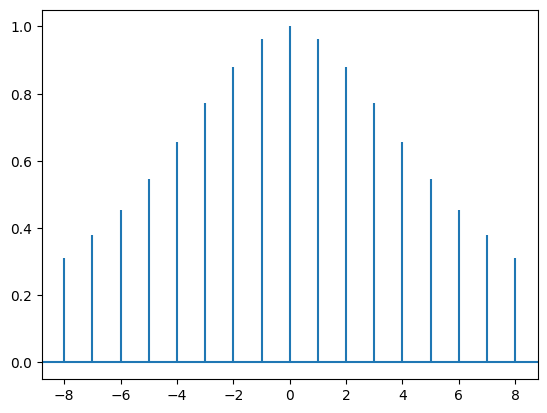

In [8]:
# autocorrelation
import pandas as pd
import matplotlib.pyplot as plt

df =  pd.read_csv('03+-+corr.csv')
df['t0'] = pd.to_numeric(df['t0'], downcast='float')
plt.acorr(df['t0'],maxlags=8)


In [9]:
# data with time lag
t_1 = df['t0'].shift(+1).to_frame()
t_1

,t0
0,NaN
1,8.0
2,14.0
3,36.0
4,56.0
5,84.0
6,94.0
7,106.0
8,110.0
9,93.0


In [ ]:
# data normalization 
df1 =  bik['demand']
